1. Pad the input image (in this project padding is going to be as adding 1 row and 1 column to each size, e.g. if your input image size 64 × 64, after padding it should be 66 × 66). 

2. For each pixel of the input image, we need to get its 33 neighbors (e.g. element 5 and its neighbors as in the red box above). Then  

3. Subtract the center pixel from its 8 neighbors. 

4. Sign 1 to the values that are greater than or equal 0 and 0 for the values that are less than 0. 

5. Concatenate the 8-bit binary code clockwise or counterclockwise. Let’s all keep the consistency and apply the clockwise order, as the example bellow (starting from the pixel in the red circle which will be at the first bit from the right (least significant bit) and following the arrows).  

6. Convert that binary code to decimal.  

7. Substitute that decimal code instead of the center pixel of that 33 window.  

8. Repeat steps 2 – 7 for all pixels of the input image (if it is size 64 × 64, that means you need to do that 4096 times).   

9. Once you finish applying the previous steps for all pixels, calculate the histogram of the LBP image that you get, which means you need to get only one histogram for each image. Note that there is no need for histogram concatenation since it is one histogram for each image.    
 

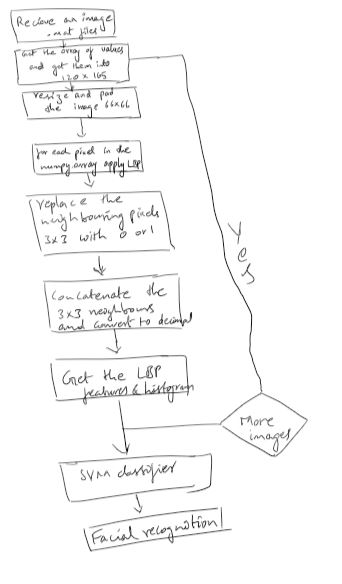

In [1]:
from IPython.display import Image
Image(filename='flo chart.jpg') 

# Reading the Images

    '''
    3*3 block moving inside the 64*64 array is in the order
    |p1 p2 p3|
    |p4  c p6|
    |p7 p8 p9|
    where c is the center X[i][j] p1 ...p9 are the boundaries within one position away around the center
    '''
    

In [568]:
def _Lbp(img):
    
    #X is a mtrix of size 64*64 which is used to store the LBP features
    X = np.ones((64,64))
    #used to store the histograms of images from 0 to 255
    hist= np.zeros(256,  dtype='int')
    #temp variable for storing the numbers generated 
    numbers = []
    
    #2. for all the pixels 64*64 that is strating from 1 untill 65, as 0 and 65 are padded with ones

    '''
    3. Subtract the center pixel from its 8 neighbors. 
    4. Sign 1 to the values that are greater than or equal 0 and 0 for the values that are less than 0. 
    '''
    for i in range(1,65):
        for j in range(1,65):
            if (img[i-1][j-1] - img[i][j]) >= 0:
                p1 = 1
            if (img[i-1][j-1] - img[i][j]) < 0:
                p1 = 0
                    
            if (img[i-1][j] - img[i][j]) >= 0:
                p2 = 1
            if (img[i-1][j] - img[i][j]) < 0:
                p2 = 0
                    
            if (img[i-1][j+1] - img[i][j]) >= 0:
                p3 = 1
            if (img[i-1][j+1] - img[i][j]) < 0:
                p3 = 0
                    
            if (img[i][j-1] - img[i][j]) >= 0:
                p4 = 1
            if (img[i][j-1] - img[i][j]) < 0:
                p4 = 0
                    
            if (img[i][j-1] - img[i][j]) >= 0:
                p6 = 1
            if (img[i][j-1] - img[i][j]) < 0:
                p6 = 0     
            
            if (img[i+1][j-1] - img[i][j]) >= 0:
                p7 = 1
            if (img[i+1][j-1] - img[i][j]) < 0:
                p7 = 0
                
            if (img[i+1][j] - img[i][j]) >= 0:
                p8 = 1
            if (img[i+1][j] - img[i][j]) < 0:
                p8 = 0
            
            if (img[i+1][j+1] - img[i][j]) >= 0:
                p9 = 1
            if  (img[i+1][j+1] - img[i][j]) < 0:
                p9 = 0
            #5. the boundaries are converted to binary format and stored in order as p6 is least significant bit ,
            #p6 till p3 in clockwise     
            arr= np.array([p3,p2,p1,p4,p7,p8,p9,p6])
            digit = ""
            
            #6. finding out the decimal value of the above generated binary string
            for p in arr:
                digit = digit+str(p)
            number = int(digit,2)
            #7. Replacing the position with the new decimal values
            X[i-1][j-1] = number
            numbers.append(number)
    #each time the number occurs in the numbers we update the value in the array by adding +1 so that we 
    #calculate the histogram
    for l in numbers:
        hist[l] = hist[l]+1
    
    #try the below code if want to see the example at the end of the code
    '''    
    import matplotlib.mlab as mlab
    import matplotlib.pyplot as plt

    x = hist
    num_bins = 256
    n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
    plt.show()     
    '''
    #returning features 
    return X

In [563]:
import scipy.io as spio
import numpy as np
from numpy import asarray
import imageio
from PIL import Image
from matplotlib import pyplot as plt

mat = spio.loadmat('AR_database.mat')

data = []
labels = []
t_data = []
t_labels = []

# using transpose as the shape of the data is in format (data, index) which will transpose the image 
Train_Data = mat['Tr_dataMatrix'].transpose((1,0))
Train_Labels = mat['Tr_sampleLabels'].transpose((1,0))
Test_Data = mat['Tt_dataMatrix'].transpose((1,0))
Test_Labels = mat['Tt_sampleLabels'].transpose((1,0))
for i in range(0,len(Train_Data)):

    #1. The image size is 165 * 120. You will find them as vectors of size 19800, 
    #so you may reshape them to 120 * 165 as you know in Python image x and y coordinates are opposite. 
    #I'd recommend that once you reshape the images, resize all of them the to 64 * 64 before you apply LBP.    
    
    Train_Dataset = Train_Data[i].reshape(120,165)
    im = np.rot90(Train_Dataset,-1)
    img = Image.fromarray(im)
    img = img.resize((64,64))

    #This step will convert the resized image back into numpy.2d array 
    d = asarray(img)
    #if i == 25:
    #  print(d)
    
    #To pad the image I am creating an array of size 66*66 as we want to pad it with 1's initializing to 1's
    x = np.ones((66,66))
    
    #Copying the 64*64 intensity values into 66*66 numpy array of ones
    x[1:-1,1:-1] = d
    #if i == 25:
    #  print(x)

    features = _Lbp(x)
    data.append(features.flatten())
    labels.append(Train_Labels[i][0])

In [564]:
for i in range(0,len(Test_Data)):
    Test_Dataset = Test_Data[i].reshape(120,165)
    _im = np.rot90(Test_Dataset,-1)
    img = Image.fromarray(_im)
    img = img.resize((64,64))
    d = asarray(img)
    y = np.ones((66,66))
    y[1:-1,1:-1] = d
    features = _Lbp(y)
    t_data.append(features.flatten())
    t_labels.append(Test_Labels[i][0])

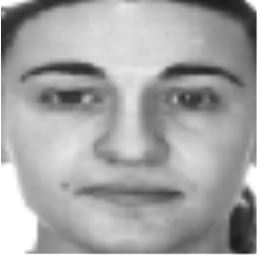

In [3]:
from IPython.display import Image
Image(filename='Image.jpg') 

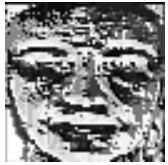

In [2]:

from IPython.display import Image
Image(filename='LBP_Image.jpg') 

In [553]:
from sklearn.preprocessing import LabelEncoder

# encode the labels, converting them from strings to integers
le = LabelEncoder()
labels = le.fit_transform(np.ravel(labels))
t_labels = le.fit_transform(np.ravel(t_labels))
#this will get the labels in the shape (data,) for training and testing

2. Write a program to train and test the linear Support Vector Machine (SVM) classifier for face recognition using the extracted features from part 1.  
 
a) Train the SVM classifier with LBP features of the training set (Tr_dataMatrix and Tr_sampleLabels).   
 
b) Classify the LBP features of the testing images using the trained SVM model (Tt_dataMatrix and Tt_sampleLabels).  
 
c) Compute the accuracy

In [557]:
from sklearn.svm import SVC
import random

trainData = t_data
testData = data
trainLabels = labels
testLabels = t_labels


svm = SVC(kernel='linear',gamma ='auto', max_iter = 1000, class_weight='balanced',random_state=40)
svm.fit(testData, trainLabels)

predicted = svm.predict(trainData)
count = 0
for i in range(0,len(predicted)):
    if (predicted[i] == testLabels[i]) :
        count+=1

accuracy = (count)/len(predicted)
print("Accuracy when linear kernel is used :",accuracy*100)



Accuracy when linear kernel is used : 93.57142857142857


3. Repeat the experiment in part 2 for training the SVM classifier with different set of kernel functions (e. g. rbf, polynomial, etc.)

In [558]:
from sklearn.svm import SVC
import random

trainData = t_data
testData = data
trainLabels = labels
testLabels = t_labels


svm = SVC(kernel='poly',gamma ='auto', max_iter = 1000, class_weight='balanced',random_state=40)
svm.fit(testData, trainLabels)

predicted = svm.predict(trainData)
count = 0
for i in range(0,len(predicted)):
    if (predicted[i] == testLabels[i]) :
        count+=1

accuracy = (count)/len(predicted)
print("Accuracy when polynomial kernel is used:",accuracy*100)


Accuracy when polynomial kernel is used: 89.42857142857143


# Example using one sample 

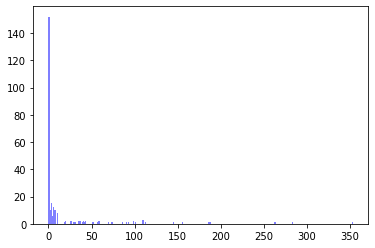

In [570]:
#1. The image size is 165 * 120. You will find them as vectors of size 19800, 
    #so you may reshape them to 120 * 165 as you know in Python image x and y coordinates are opposite. 
    #I'd recommend that once you reshape the images, resize all of them the to 64 * 64 before you apply LBP.    
    
Train_Dataset = Train_Data[350].reshape(120,165)
im = np.rot90(Train_Dataset,-1)
img = Image.fromarray(im)
img = img.resize((64,64))
img.show()
#This step will convert the resized image back into numpy.2d array 
d = asarray(img)
#if i == 25:
#  print(d)
    
#To pad the image I am creating an array of size 66*66 as we want to pad it with 1's initializing to 1's
x = np.ones((66,66))
    
#Copying the 64*64 intensity values into 66*66 numpy array of ones
x[1:-1,1:-1] = d
#if i == 25:
#  print(x)

features = _Lbp(x)
f = Image.fromarray(features)

f.show(0)

4.Repeat the experiment in part 2 for training using any other different classifier.  

In [575]:
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [582]:
trData =[]
ttData = []
for x in range(700):
        # minmax-normalize the samples (rows). 
    normalized_array = (trainData[x] - min(trainData[x])) / (max(trainData[x]) - min(trainData[x]))
    trData.append(normalized_array)
    normalized_array_ = (testData[x] - min(testData[x])) / (max(testData[x]) - min(testData[x]))
    ttData.append(normalized_array_)
 
for K in range(3):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(trData, trainLabels) 
    y_pred = neigh.predict(ttData)
    print ("Accuracy is ", accuracy_score(testLabels,y_pred)*100,"% for K-Value:",K_value)

Accuracy is  90.28571428571428 % for K-Value: 1
Accuracy is  76.28571428571429 % for K-Value: 2
Accuracy is  77.28571428571429 % for K-Value: 3
